In [2]:
import pandas as pd
import mglearn
import matplotlib.pyplot as plt

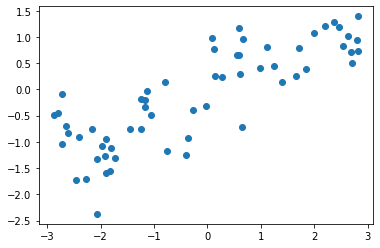

In [3]:
input_data, target_data = mglearn.datasets.make_wave(n_samples=60)
plt.scatter(input_data,target_data)

In [7]:
target_data.shape #타겟은 결과값이라 칼럼이 없다 

(60,)

#### 인풋데이터가 들어가서 타겟 데이터가 나오게 

In [9]:
input_data.shape

(60, 1)

In [11]:
#y= aX+b   알파가 에이 베타가 비
#알파 베타 값을 기준으로 예측값 출력
def prediction(alpha,beta,x):
    result= (alpha*x)+beta
    return result

#오차계산 함수
def prediction_difference(alpha,beta,x,y):
    result = (alpha*x)+beta
    diff = result-y
    return diff

import numpy as np  #넘파이는 어레이로 만들어주기 위해 써준거 
input_data = np.array(input_data).reshape(60)  # 차원이 하나니까 정렬시켜준거 reshape  -> (60*1)이었던걸 그냥 60개로 정렬햊ㄴ거
alpha = 0.6
beta = -0.1
target_data=np.array(target_data).reshape(60)

prediction_difference(alpha,beta,input_data,target_data)# 오차 출력

array([ 0.62907754,  1.02241238,  0.5974493 , -0.91879123, -0.01797392,
        1.03522762, -0.98972596,  0.01503431, -0.02861541,  0.19934574,
       -1.33942417,  0.19651976,  0.02295321,  0.17280227,  0.03165293,
       -0.29398533, -0.47781711, -0.27222077,  0.91135753, -0.10510562,
       -0.65983542, -0.64541301, -0.66976573, -0.71478724,  0.12760639,
        0.12763287, -0.06169033, -1.02798765, -0.42553991, -1.6514085 ,
        1.00858772, -0.20935055, -0.82896455,  0.80652911,  0.62545694,
        0.62913247, -0.60726217, -0.63447299, -0.24939928,  0.61871379,
        0.25065324,  0.20573258, -1.32907005,  0.17542454, -0.21688575,
        0.08495681, -0.75218508, -0.80389498, -0.17122528,  0.35379577,
        0.85909114,  0.63955272,  0.46638351,  0.0318969 , -0.39969411,
        0.59260484,  0.14266711,  0.35218399, -0.69986583, -0.237494  ])

In [12]:
prediction(alpha,beta,input_data)  #결과 예측

array([-0.55165557,  1.5225715 ,  0.73517819,  0.25517054, -1.33833289,
       -1.33841973, -1.690899  ,  1.21823412,  0.26401404,  0.64906128,
       -1.82589582,  1.59167547,  1.09679351, -1.1355792 , -1.24543012,
       -1.23974376, -0.80472793, -0.01087685, -0.34499793, -0.8515751 ,
        0.30267042, -1.3978221 , -0.84827927, -0.58109736, -0.25814806,
        0.92663346, -1.18117438, -0.04875602,  0.23269245, -1.73277851,
        0.28716147, -1.28611315, -1.66581427,  1.51598793,  1.57627532,
        1.01023045, -0.80339043, -1.54838039,  0.5632389 , -0.31545102,
       -1.46066235, -0.11736312, -1.77620132,  1.37355345, -0.96839207,
        0.48508022, -0.77784013, -0.02775512,  0.06815701, -1.23452396,
        1.59050466,  0.89047816,  1.48219619,  1.32137846,  0.25243992,
        1.41874725, -1.58142699, -1.1944617 , -1.73718176, -0.72881081])

0 번째 이터레이션


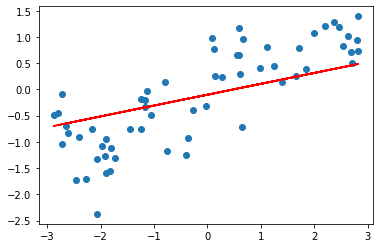

50 번째 이터레이션


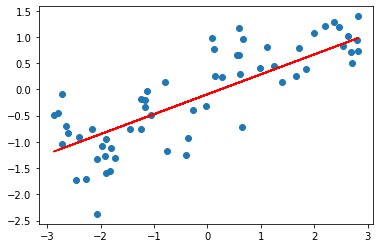

100 번째 이터레이션


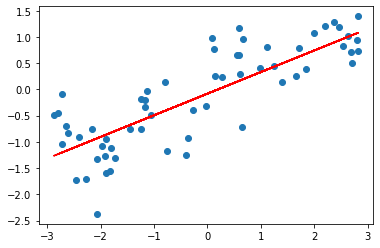

In [32]:
# target data와의 오차를 계산
def prediction_difference(alpha, beta, x, y):
    result = (alpha * x) + beta
    diff = result - y
    return diff

def gradient_descent(alpha, beta, x, y, iterations, learning_rate):   #오차를 계산한다음 러닝레이트만큼 점프해서 
                                                                #오차가 적은방향으로 나아가는것 러닝레이트만큼 몇번 나아갈것인가
    m = len(x)
    cost_list = []
    for _ in range(iterations):       #이터레이션만큼 반복
        error = prediction_difference(alpha,beta, x, y)   #에러를 계속 계산하는거 
        cost = (error@error) / 2*m    # 행렬 연산

        cost_list.append(cost)
        beta = beta - learning_rate * error.mean()    #
        alpha = alpha - learning_rate * (error * x).mean()
        if _ % 50 == 0: # 50개 마다 그래프 출력
            print(_,'번째 이터레이션')
            plt.scatter(input_data,target_data)
            plt.plot(input_data, prediction(alpha,beta, x), color = 'red')
            plt.show()
    return alpha,beta, cost_list

input_data = np.array(input_data).reshape(60)
target_data = np.array(target_data).reshape(60)

# 초기값 (시작지점 지정)
alpha = 0.2
beta = -0.1

alpha,beta,cost_list = gradient_descent(alpha, beta, input_data,target_data,150, 0.01)
#러닝레이트: 얼마나 점프할거냐 // 이터레이션: 몇번을 돌릴거냐

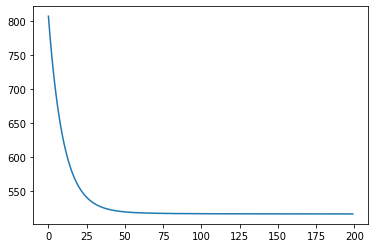

In [25]:
# 러닝레이트 0.015
plt.plot(cost_list)  #x가 이터레이션  

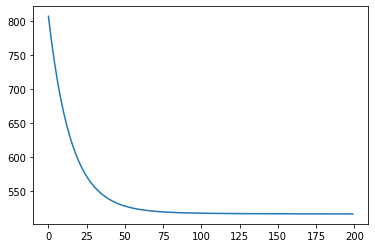

In [27]:
# 러닝레이트 0.01
plt.plot(cost_list)

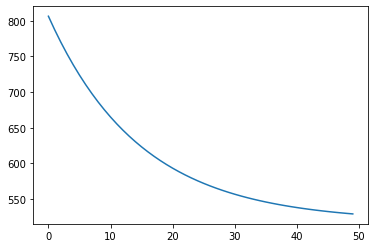

In [29]:
#이터레이션 50
plt.plot(cost_list)  #학습이 부족해서 더 시켜줄수 있을거같다. 언더피팅

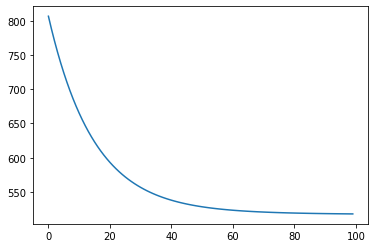

In [31]:
#이터레이션 100
plt.plot(cost_list)

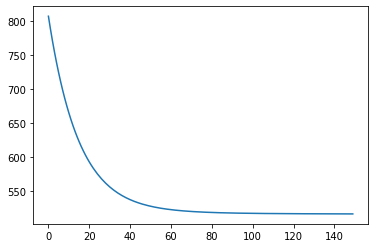

In [33]:
#이터레이션 150    # 많이할수록 정확도가 커지는데 시간이 많이든다는게 꼭 좋다고 할수는 없다. 
plt.plot(cost_list)

### Scikit-learn

In [36]:
### 보스턴 주택가격예측
from sklearn.datasets import load_boston
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



In [50]:
boston_dataset=load_boston()  #데이터셋을 불러옵니다. 엑셀파일이었으면 pd.read_csv 이런느낌
boston_dataset['data'] #칼럼이 13개니까 각각0부터 13개까지 있다는거

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [44]:
data=boston_dataset['data']
data.shape  #칼럼 13개 

(506, 13)

In [45]:
boston_dataset['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [46]:
x=pd.DataFrame(boston_dataset['data'],columns=boston_dataset['feature_names'])
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [51]:
#MEDV 본인소유의 주택가격 
boston_dataset['target']

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [48]:
#목표변수  MEDV는 그냥 칼럼명을 지정해준거
y=pd.DataFrame(boston_dataset['target'],columns=['MEDV'])
y

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1004)
#x가 인풋 y가 타겟
#트레인과 테스트의 역할 : 이 모델이 잘 학습됐는지 확인되려면 테스트해줘야함 
#문제를 100문제를 가지고 있는데 평가를 할때 100문제를 다 교육을 시켜주고 문제를 내면 쉽겠죠? : 오버피팅

#제대로 평가를 하려면 80문제만 교육하고 실제로 평가를 할떄는 나머지 20문제를 꺼내주는거 
#트레인은 교육했던 80개 테스트는 20개 라고 생각하면됨 (train:교육할떄 썼던 데이터, test : 실험할 데이터 )
#이 모델이 얼마나 믿을만한가 검증하는거 
#test_size = 니가 몇퍼센트만큼 테스트로 쓸래? 20%
#데이터가 많으면 테스트셋은 높여도 된다 
#보통 7:3 을 많이쓰고 ~ 9:1 까지도 쓴다 . 9:1은 데이터가 적을때 

In [59]:
print(x_train.shape)  #테스트할때 사용할거는 트레인할때 사용하면안됨!
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404, 1)
(102, 1)


In [60]:
## 머신러닝 모델만들기
model=LinearRegression()
model.fit(x_train,y_train) #fit : 데이터 넣어주기 

LinearRegression()

In [61]:
model.coef_  #모델에대한 칼럼의 기록

array([[-8.31250759e-02,  5.04950616e-02, -3.96534069e-04,
         3.44424430e+00, -1.35226625e+01,  3.54788012e+00,
         1.25855871e-03, -1.47501679e+00,  3.12079206e-01,
        -1.15933807e-02, -9.20011566e-01,  1.13992300e-02,
        -5.88706540e-01]])

In [62]:
model.intercept_ # y절편

array([35.07083373])

In [63]:
# 테스트 데이터셋은 문제를 잘 푸는지 맞추는거 # 실제적으로 문제를 잘 푸는지 타겟데이터를 넣어야될까 인풋데이터를 넣어야될까
# 정답은 인풋을 넣어야된다 # 그래서 정답은 x test를 넣어야됨 
#xtest=(시험문제,인풋데이터) ytest=(정답지,타겟데이터)
#시험문제를 넣어서 잘 푸는지 확인해봐야하기때문에 xtest 인풋데이터를 넣어야됨
#y-test로 답이 잘 맞았는지 확인하기 위해 필요함
y_test_prediction = model.predict(x_test)

In [65]:
# 오차 측정할떄 : y_test_prediction 과  y_test를 비교
# 작으면 작을수록 좋은 모델
mean_squared_error(y_test,y_test_prediction)

19.450267341373358

## 비지도학습
### Classification

In [66]:
from sklearn.datasets import load_iris
import pandas as pd

In [100]:
iris_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [67]:
iris_data = load_iris()


# 1. 인풋데이터와 타겟데이터 구분
x= pd.DataFrame(iris_data['data'],columns = iris_data.feature_names)
y= pd.DataFrame(iris_data['target'],columns = ['class'])

In [70]:
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [74]:
y['class'].unique()

array([0, 1, 2])

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [128]:
# 2. 트레인데이터와 테스트 데이터 구분합니다.
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [78]:
'''
# 이런 식 위에거 train_test_split 함수를 실행하면 각각 주는거 
def cal (a,b):
    return a+b, a-b, a*b, a/b

add,diff, mul, jivi=cal(1,2)
'''

In [129]:
# 3. 모델생성  #맥스뎁스 : 의사결정나무가 얼마나 들어갈건지
model= DecisionTreeClassifier(max_depth=4)

In [130]:
# 4. 모델에 데이터 적용  #학습할때 적용할 문제와 정답을 알려줌
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [131]:
# 5. 모델로 예측
model.predict(x_test)

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1])

In [132]:
# 6.모델성능 #정확도 0.9
model.score(x_test,y_test)

0.956140350877193

In [133]:
import matplotlib.pyplot as plt
import numpy as np 

importance = model.feature_importances_
importance

array([0.02408086, 0.        , 0.        , 0.        , 0.03480834,
       0.        , 0.        , 0.        , 0.01759755, 0.        ,
       0.        , 0.        , 0.        , 0.00978674, 0.        ,
       0.        , 0.        , 0.        , 0.00981501, 0.        ,
       0.        , 0.        , 0.01591429, 0.1383412 , 0.        ,
       0.        , 0.00993066, 0.73972534, 0.        , 0.        ])

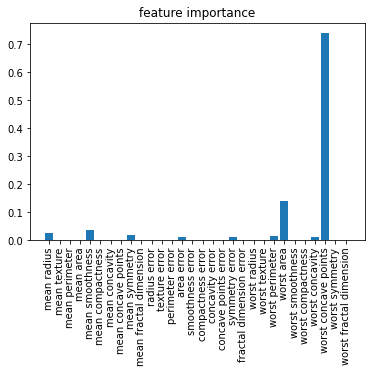

In [134]:
plt.figure()
plt.title('feature importance')
plt.bar(range(len(importance)), importance)
plt.xticks(range(len(importance)), x.columns, rotation = 90)
plt.show()

### 문제풀기 

In [113]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

import pandas as pd

cancer_data = load_breast_cancer()

#데이터 분리 1단계
x=pd.DataFrame(cancer_data['data'],columns=cancer_data.feature_names)
y=pd.DataFrame(cancer_data['target'],columns=['class'])




In [ ]:
cancer_data

In [143]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)

In [154]:
#의사결정나무 모델 생성
model= DecisionTreeClassifier(max_depth=5,random_state=5)#모델생성할떄도 랜덤state를 고정하면 맥스뎁스에 따라 결과가 달라지는지 확인가능

In [155]:
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=5)

In [156]:
# test 데이터 predict
model.predict(x_test)

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1])

In [157]:
#정확도 score
model.score(x_test,y_test)

0.935672514619883

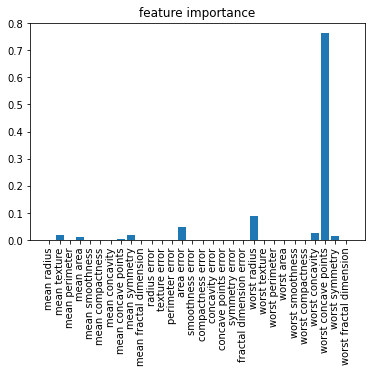

In [153]:
importance = model.feature_importances_
importance

plt.figure()
plt.title('feature importance')
plt.bar(range(len(importance)), importance)
plt.xticks(range(len(importance)), x.columns, rotation = 90)
plt.show()

In [142]:
tree=DecisionTreeClassifier(max_depth=4,random_state=0)
tree.fit(x_train,y_train)

print('훈련세트정확도 : {:.3f}'.format(tree.score(x_train,y_train)))
print('테스트세트정확도 : {:.3f}'.format(tree.score(x_test,y_test)))

훈련세트정확도 : 0.985
테스트세트정확도 : 0.956


C:\Users\heysunn\AppData\Local\Temp\ipykernel_6580\2879447920.py:4: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("retina")


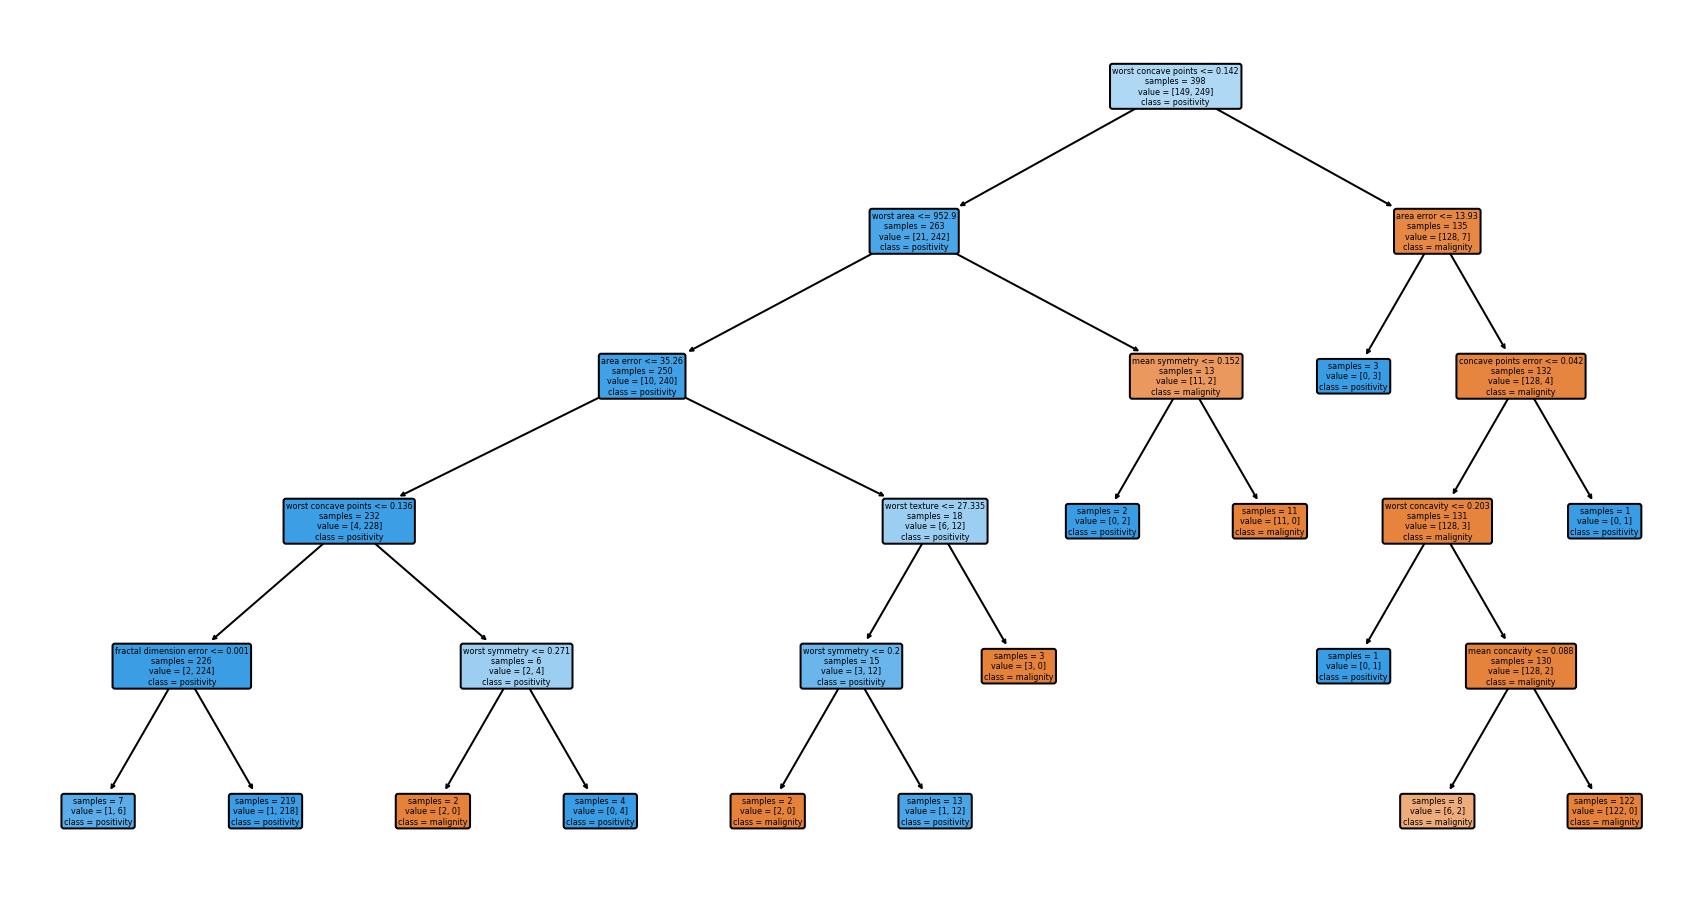

In [158]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")
plt.rcParams['figure.figsize'] = [15,8]

plot_tree(model, class_names=["malignity", "positivity"], feature_names=cancer_data.feature_names,
impurity=False, filled=True, rounded=True, fontsize=4)

plt.show()

In [159]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

import pandas as pd

cancer_data = load_breast_cancer()

#데이터 분리 1단계
x=pd.DataFrame(cancer_data['data'],columns=cancer_data.feature_names)
y=pd.DataFrame(cancer_data['target'],columns=['class'])
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=1004)

In [160]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_scaled= scaler.transform(x_train)

In [161]:
x_train.max()

mean radius                  28.11000
mean texture                 39.28000
mean perimeter              188.50000
mean area                  2501.00000
mean smoothness               0.16340
mean compactness              0.34540
mean concavity                0.42680
mean concave points           0.20120
mean symmetry                 0.30400
mean fractal dimension        0.09744
radius error                  2.87300
texture error                 3.89600
perimeter error              21.98000
area error                  542.20000
smoothness error              0.03113
compactness error             0.13540
concavity error               0.30380
concave points error          0.04090
symmetry error                0.07895
fractal dimension error       0.02286
worst radius                 36.04000
worst texture                49.54000
worst perimeter             251.20000
worst area                 4254.00000
worst smoothness              0.21840
worst compactness             1.05800
worst concav

In [163]:
x_train_scaled.max(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [164]:
x_test_scaled = scaler.transform(x_test)

In [171]:
x_test_scaled.max(axis=1)  #트레인은 잘 됐는데 왜 1이상값이 있을까? 
                            #스케일러를 만들때 x트레인으로 만들어서 
                            #x 테스트 같은 스케일러를 만들. ....
                            #별도의 스케일러를 만드는거만 안하면됨 

array([0.43396226, 0.65965514, 0.79948961, 0.51785714, 0.70378007,
       0.86151203, 0.5348159 , 0.46555927, 0.52749141, 0.42563966,
       0.59301706, 0.46826758, 0.63322661, 0.4858742 , 0.31515926,
       0.35910653, 0.45808081, 0.60744386, 0.66632302, 0.38851815,
       0.4540404 , 0.59140893, 0.49725086, 0.51839019, 0.59168793,
       0.89571192, 0.30852234, 1.27971039, 0.51441147, 1.31777539,
       0.56305859, 0.45757576, 0.61030928, 0.65010842, 0.67116296,
       0.67407948, 0.64637258, 0.9578778 , 0.704811  , 0.61344372,
       0.52478678, 0.80896478, 0.62763269, 0.70790378, 0.4759319 ,
       0.85256724, 0.5468087 , 0.87388316, 0.66701031, 0.80618557,
       0.50798953, 0.37053339, 0.35287846, 0.51168385, 0.49471382,
       0.67216495, 0.42070707, 0.49354518, 0.50419249, 0.68041237,
       0.61007463, 0.77216495, 0.36544191, 0.42750533, 0.53627415,
       0.68876993, 0.43816631, 0.49535073, 0.50127598, 0.68178694,
       0.54861425, 0.61717252, 0.36010101, 0.93450479, 0.48903